# Corona's influence on young women's unemployment

Imports and set magics:

In [129]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader 
import plotly.express as px
import statsmodels.formula.api as smf

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [130]:
# loading data. Change path to your own.
data = pd.read_excel('/Users/clarajensen/Desktop/Introduction to Programming and Numerical Analysis /projects-2023-mc/dataproject/data.xlsx')
data.head()

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,fdi,Inflation,QGDP,Inequality,id,t
0,Australia,2019Q3,0.00,11.8,13.03,10.22,-0.3,1.1,NaN,1.67,0.8,1,1,1
1,Australia,2019Q4,0.00,11.91,13.14,10.43,-6.9,-0.6,NaN,1.84,0.4,1,1,2
2,Australia,2020Q1,176.79,12,13.59,10.75,-5.7,-0.5,3316.8,2.19,-0.3,1,1,3
3,Australia,2020Q2,130.33,15.35,16.08,14.62,-2.7,-4.8,251.8,-0.35,-6.8,1,1,4
4,Australia,2020Q3,743.60,14.96,15.73,13.99,2.1,0.7,6965.3,0.69,3.4,1,1,5


In [131]:
# dropping column variables
data2=data.drop(['fdi', 'untotal', 'Investment', 'Inflation', 'QGDP', 'Inequality'], axis=1)
print(data2)

           Country    year    Corona  unmen  unwomen  trade  id  t
0       Australia   2019Q3      0.00  13.03    10.22   -0.3   1  1
1       Australia   2019Q4      0.00  13.14    10.43   -6.9   1  2
2       Australia   2020Q1    176.79  13.59    10.75   -5.7   1  3
3       Australia   2020Q2    130.33  16.08    14.62   -2.7   1  4
4       Australia   2020Q3    743.60  15.73    13.99    2.1   1  5
..             ...     ...       ...    ...      ...    ...  .. ..
337  United States  2020Q3  13807.03  15.90    15.20   23.0  38  5
338  United States  2020Q4  38906.29  13.00    10.97    7.6  38  6
339  United States  2021Q1  31167.54  11.97    10.13    6.3  38  7
340  United States  2021Q2   9595.44  10.90     9.33    6.8  38  8
341  United States  2021Q3  28991.92  10.30     8.40    1.0  38  9

[342 rows x 8 columns]


In [132]:
# dropping row variables that are not EU countries

I = data2.Country.str.contains('Australia')
I |= data2.Country.str.contains('Canada')
I |= data2.Country.str.contains('Chile')
I |= data2.Country.str.contains('Colombia')
I |= data2.Country.str.contains('Costa Rica')
I |= data2.Country.str.contains('Iceland')
I |= data2.Country.str.contains('Israel')
I |= data2.Country.str.contains('Japan')
I |= data2.Country.str.contains('Korea')
I |= data2.Country.str.contains('Mexico')
I |= data2.Country.str.contains('New Zealand')
I |= data2.Country.str.contains('Norway')
I |= data2.Country.str.contains('Switzerland')
I |= data2.Country.str.contains('Turkey')
I |= data2.Country.str.contains('United Kingdom')
I |= data2.Country.str.contains('United States')

data2.loc[I, :]

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Australia,2019Q3,0.00,13.03,10.22,-0.3,1,1
1,Australia,2019Q4,0.00,13.14,10.43,-6.9,1,2
2,Australia,2020Q1,176.79,13.59,10.75,-5.7,1,3
3,Australia,2020Q2,130.33,16.08,14.62,-2.7,1,4
4,Australia,2020Q3,743.60,15.73,13.99,2.1,1,5
...,...,...,...,...,...,...,...,...
337,United States,2020Q3,13807.03,15.90,15.20,23.0,38,5
338,United States,2020Q4,38906.29,13.00,10.97,7.6,38,6
339,United States,2021Q1,31167.54,11.97,10.13,6.3,38,7
340,United States,2021Q2,9595.44,10.90,9.33,6.8,38,8


In [133]:
data2 = data2.loc[I == False] # keep everything else
data2.head(10)

,Country,year,Corona,unmen,unwomen,trade,id,t
9,Austria,2019Q3,0.00,10.50,8.97,-1.8,2,1
10,Austria,2019Q4,0.00,10.47,7.73,-0.7,2,2
11,Austria,2020Q1,1125.72,11.13,8.90,-1.1,2,3
12,Austria,2020Q2,838.87,15.27,13.17,-16.5,2,4
13,Austria,2020Q3,2990.91,12.40,10.53,21.6,2,5
14,Austria,2020Q4,34944.10,11.60,9.97,4.9,2,6
15,Austria,2021Q1,20503.43,12.00,12.80,7.7,2,7
16,Austria,2021Q2,11514.23,12.10,11.90,2.3,2,8
17,Austria,2021Q3,10029.00,10.10,10.17,-0.2,2,9
18,Belgium,2019Q3,0.00,13.20,11.70,-1.8,3,1


In [134]:
data2.reset_index(inplace = True, drop = True) # Drop old index too
data2.iloc[0:300,:]

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Austria,2019Q3,0.00,10.50,8.97,-1.8,2,1
1,Austria,2019Q4,0.00,10.47,7.73,-0.7,2,2
2,Austria,2020Q1,1125.72,11.13,8.90,-1.1,2,3
3,Austria,2020Q2,838.87,15.27,13.17,-16.5,2,4
4,Austria,2020Q3,2990.91,12.40,10.53,21.6,2,5
...,...,...,...,...,...,...,...,...
193,Sweden,2020Q3,2443.59,27.73,25.30,17.1,34,5
194,Sweden,2020Q4,33908.52,24.67,22.67,6.1,34,6
195,Sweden,2021Q1,36171.38,25.23,23.80,6.3,34,7
196,Sweden,2021Q2,28036.67,27.73,23.90,9.0,34,8


## Explore data set

**Interactive scatter plot**

In [135]:
# choosing one time period to investigate
T = data2.year.str.contains('2021Q2')
data2.loc[T, :]

,Country,year,Corona,unmen,unwomen,trade,id,t
7,Austria,2021Q2,11514.23,12.10,11.90,2.3,2,8
16,Belgium,2021Q2,17373.73,18.00,20.70,11.6,3,8
25,Czech Republic,2021Q2,12567.70,7.40,8.57,3.0,8,8
34,Denmark,2021Q2,10791.46,NaN,NaN,4.1,9,8
43,Estonia,2021Q2,18566.42,15.93,19.07,7.6,10,8
52,Finland,2021Q2,3232.49,21.07,18.13,5.8,11,8
61,France,2021Q2,16766.01,19.23,20.23,1.6,12,8
70,Germany,2021Q2,10628.72,7.50,6.70,1.5,13,8
79,Greece,2021Q2,15248.66,34.94,43.77,3.9,14,8
88,Hungary,2021Q2,16155.32,11.80,16.50,0.6,15,8


In [136]:
data3 = data2.loc[T == True] # keep everything else

In [137]:
data3.reset_index(inplace = True, drop = True) # Drop old index too
data3.iloc[0:300,:]

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Austria,2021Q2,11514.23,12.10,11.90,2.3,2,8
1,Belgium,2021Q2,17373.73,18.00,20.70,11.6,3,8
2,Czech Republic,2021Q2,12567.70,7.40,8.57,3.0,8,8
3,Denmark,2021Q2,10791.46,NaN,NaN,4.1,9,8
4,Estonia,2021Q2,18566.42,15.93,19.07,7.6,10,8
5,Finland,2021Q2,3232.49,21.07,18.13,5.8,11,8
6,France,2021Q2,16766.01,19.23,20.23,1.6,12,8
7,Germany,2021Q2,10628.72,7.50,6.70,1.5,13,8
8,Greece,2021Q2,15248.66,34.94,43.77,3.9,14,8
9,Hungary,2021Q2,16155.32,11.80,16.50,0.6,15,8


In [138]:
# creating scatterplot
fig = px.scatter(data_frame=data3, x='Corona', y='unwomen', trendline="ols")

# customizing layout
fig.update_layout(
    title="Corona cases and women's unemployment rate for 2021Q2",
    xaxis_title='Corona cases',
    yaxis_title='Unemployment'
)

# show scatterplot
fig.show()

This scatter plot shows no correlation between women's unemployment and corona cases in the second quarter of 2021.

**Sub plot**

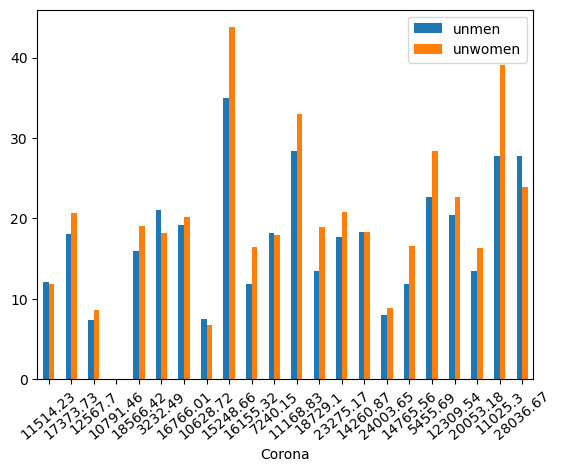

In [139]:
# creating sub plot
fig, ax = plt.subplots()
data3.plot.bar(x = 'Corona', y = ['unmen', 'unwomen'], rot = 40, ax = ax) ;

The tendencies for all countries is that women's unemployment is higher than men's unemployment in the second quarter of 2021.

Note: change this plot to a plot that shows how women's unemployment change duing the time period.

# Analysis

We want to investigate the effect of corona on the unemployment rate for young women by using a fixed effect estimation. We assume that there exist unobservable time invariant variables for example gender, marriage, nationality etc., which are relevant for our model. Thus, we are using fixed effect estimation to be able to remove these variables and create a consistent model. We are using trade and the unemployment rate for men as control variables.

In [140]:
results_fe1 = smf.ols("unwomen ~ Corona + unmen + trade + C(t)", data=data2).fit()
print(results_fe1.summary())

                            OLS Regression Results                            
Dep. Variable:                unwomen   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     56.73
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.97e-52
Time:                        14:19:12   Log-Likelihood:                -553.40
No. Observations:                 191   AIC:                             1131.
Df Residuals:                     179   BIC:                             1170.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7513      1.206     -1.452      0.1

The model is predicting the unemployment rate from 2019Q3-2021Q3. In 2019Q3 it is predicted to be -1.7513, in 2019Q4 to be -1.8925 (-1.7513-0.1412) and so on. Corona appears to be insignificant, which indicating that it does not have any effect on the unemployment rate for young women. This is also the case for the trade variable. Whereas the unemployment rate for men is significant, which is expected. Hereby, we can conclude that the unemployment rate for men affects the unemployment rate for women. 

# Conclusion

We have investigated corona's influence on young women's unemployment using descriptive plot and fixed effect estimation. We find that there is no correlation between the numbers of corona cases and women's unemployment. For further investigation of the model, it could be relevant to include variables as GDP, investment ect. since it is highly possible that it affects the unemployment rate of young women.